## Final Project Submission

Please fill out:
* Student name: Ivy Kemunto
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samwel Jane
* Blog post URL:


* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbor

# BUSINESS UNDERSTANDING

- Maison Real Estate Agency wants to invest in some areas of King County Area. The stakeholders of Maison Real Estate Agency want me to conduct an Analysis on the provided data, In order to provide accurate recommendations on the ways to carry out their investments in order to maximise their profits.

# BUSINESS PROBLEM TO BE SOLVED
- Maison Real Estate Agency have decided to invest in the King County Area in the USA however, they want to be certain of the best ways to note where to invest their Capital in. 

# -DATA UNDERSTANDING
- In order to get the best out of the dataset provided, I conducted some exploratory data analysis and bivariate and univariate Analysis. On top of that some reading also gave me some more insight in order to understand the data a bit better.

# IMPORT APPROPRIATE LIBRARIES

In [ ]:
import pandas as pd
import requests
import numpy as np
import time
import matplotlib.pyplot as pylot
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
!pip install geopandas
!pip install contextily
import geopandas as gpd
import contextily as ctx

# STEP TWO: DATA MINING
-DATA EXTRACTION 
We have already established that the data to be used is in csv formart.
We extract it from where it is located and load it.

In [ ]:
#LOADING THE DATASET
kc_house_data=pd.read_csv(r"C:\Users\ADMIN\Desktop\dsc-phase-2-project\data\kc_house_data.csv")
kc_house_data

 # STEP THREE: DATA CLEANING (BIVARIATE AND UNIVARIATE ANALYSIS WILL ALSO BE CONDUCTED IN THIS STEP)
-We index the data set

-We get the dimensions

-We find out the data types

-We get the descriptive statistics

-We get the column labels in order to understand the data better

-We clean the data



In [ ]:
#view dataframe as index
kc_house_data.index

In [6]:
#knowing the data types of the data frame
kc_house_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Notice that the [sqft_basement] is an object instead of  float 

In [7]:
#converting the sqft_basement to a float
kc_house_data["sqft_basement"]=pd.to_numeric(kc_house_data["sqft_basement"])

ValueError: Unable to parse string "?" at position 6

-We cannot convert to a float as there is a string as indicated in the value error.
-The value error indicates presence of a question mark "?"

In [8]:
#Converting the "?" to 0.0 in sqft basement
kc_house_data["sqft_basement"]=kc_house_data["sqft_basement"].replace("?", 0.0)

In [9]:
#converting the sqft_basement to a float
kc_house_data["sqft_basement"]=pd.to_numeric(kc_house_data["sqft_basement"])

In [10]:
#Checking if "sqft_basement" has succesfully converted to a float
kc_house_data["sqft_basement"].describe

<bound method NDFrame.describe of 0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64>

"sqft_basement" succesfully converted to a float

In [11]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [12]:
# Selecting the kc_house_data columns
kc_house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
#Getting the shapes of the kc_house_data to know the number of rows and columns in the data frame 
kc_house_data.shape

(21597, 21)

In [14]:
#printing information on the kc_house_data data frame (understanding the columns that are in the data frame)
kc_house_data.info

<bound method DataFrame.info of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  

In [15]:
#describing the data frame to get more information off the kc_house_data data frame
kc_house_data.describe

<bound method NDFrame.describe of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view

In [16]:
#getting the statistical properties from the kc_house_data data frame 
kc_house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
#getting information including non numerical columns
kc_house_data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,...,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,...,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [18]:
#checking for missing values in the imdbbr data frame
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

      -There is presence of missing values in "waterfront","view" and "yr_renovated" columns

In [19]:
kc_house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Dealing with the missing values in view

After doing some research I discovered that view is a categorical(Ordinal-Ordered) data type hence why most ranged from 0-4. Each number represented something as shown :-    

* **0: No view-The property does not have any view that could add value to the property**

* **1: Poor view-The property has a view but it is not exactly desirable.**

* **2: Fair view-The property has a view that is somewhat desirable.**

* **3: Good view-The property has a desirable view that could add value to the property.**

* **4: Panoramic view-The property has view that is exceptional and could be a major selling point for the property.**



-Creating a separate category for the missing values is what I deemed appropriate. This is because mean cannnot work with a categorical datatype.
-I wasnt sure about mode either as it might affect the results

In [20]:
#Filling the missing values with a "5.0" to represent the houses we do not know if they have views or not.
kc_house_data["view"]=kc_house_data["view"].fillna(5.0)
#Checking for any unique values
kc_house_data["view"].unique()

array([0., 5., 3., 4., 2., 1.])

In [21]:
#Assigning the appropriate data type for the "view" column. From float64 to category
kc_house_data["view"]=kc_house_data["view"].astype("category")
kc_house_data["view"].dtype

CategoricalDtype(categories=[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

-After creating a new category, the new categories are as follows

Each number represented something as shown :-    

* **0: No view-The property does not have any view that could add value to the property**

* **1: Poor view-The property has a view but it is not exactly desirable.**

* **2: Fair view-The property has a view that is somewhat desirable.**

* **3: Good view-The property has a desirable view that could add value to the property.**

* **4: Panoramic view-The property has view that is exceptional and could be a major selling point for the property.**

* **5: Not Known- The property is not known whether to have view or not.**


In [22]:
#Checking the number of values for each category
kc_house_data["view"].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
5.0       63
Name: view, dtype: int64

-Note that the houses with No view are the most and the ones where the view is unknown are the least

In [23]:
#Checking if there are any missing values in the "view" column
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The missing values in the "view" column have succesfully been dealt with 

# Dealing with the missing values in the "waterfront" column

"waterfront" has many missing values.(2376)
-After some research I found out that the "waterfront" column is supposed to be categorical(Nominal-No order) with two categories 

* **0: This indicates that the column does not have a view of a waterfront**

* **1: This indicates that the property has a view of a waterfront**


-Mode would be appropriate to fill the missing values as the "waterfront" column is categorical

In [24]:
#Filling the missing values in the "waterfront" column with the mode 
mode_waterfront=kc_house_data["waterfront"].mode()[0]
kc_house_data["waterfront"]=kc_house_data["waterfront"].fillna(mode_waterfront)

    -Converting the waterfront column to categorical

In [25]:
#Converting the "waterfront" column to a categorical datatype
kc_house_data["waterfront"]=kc_house_data["waterfront"].astype("category")
kc_house_data["waterfront"].dtype

CategoricalDtype(categories=[0.0, 1.0], ordered=False)

In [26]:
#Checking for missing values in the " waterfront" column
missing_val=kc_house_data["waterfront"].isnull().sum()
missing_val

0

Missing values succesfully dealt with in the "waterfront" column

In [27]:
#confirming that "waterfront"column does not have any missing values 
kc_house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

    The only missing values remaining are in the yr_renovated
-Missing values in the "waterfront column have succesfully been dealt with 

# Dealing with the missing values in the "yr_renovated" column

-I was not sure how to go about the missing values on here as I was not sure if the missing values indicated that the houses were not renovated or there was an error while recorded.
    -I decided to compare the kurtosis to figure it out 

In [28]:
#Checking the kurtosis of the "yr_renovated" column with the missing values included
from scipy.stats import kurtosis
kt_with_msingval = kurtosis(kc_house_data["yr_renovated"].dropna())
kt_with_msingval

18.91387801296416

In [29]:
#Checking the kurtosis the "yr_renovated" column without the missing values included
from scipy.stats import kurtosis
kt_without_msingval=kurtosis(kc_house_data["yr_renovated"].fillna(0))
kt_without_msingval

24.071048090045018

-From the values of the kurtosis above I decided to use median as mean was not appropriate due to the significantly high kurtosis
-Without the missing values indicated a higher kurtosis meaning an even heavier tail thus the missing values did not have a significant effect on the kurtosis of the"yr_renovated" column 


In [30]:
#Filling the missing values in the "yr_renovated" column with the median
median_renovated =kc_house_data["yr_renovated"].median()
kc_house_data["yr_renovated"]=kc_house_data["yr_renovated"].fillna(median_renovated)

In [31]:
#Checking for missing values in the "yr_renovated" column
missing_values=kc_house_data["yr_renovated"].isnull().sum()
missing_values

0

-The missing values in the "yr_renovated" column have succesfully been dealt with

# Checking if the dataset is "clean"

-Checking if the datatypes are appropriate

In [32]:
#Checking the datatypes in the kc_house_data dataset
kc_house_data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition           int64
grade               int64
sqft_above          int64
sqft_basement     float64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

-After some research i found out that there are multiple categories that have been missassigned 
The columns "condition", "grade" and "zipcode" have been missassigned as int64 instead of categories 


# The "condition" column 
- The condition column is a categorical(Ordinal-ordered) variable indicating the condition of the property rating it from 1-5.

- Explanations for each category are as follows:-

* **1=POOR**

* **2=FAIR**

* **3=AVERAGE**

* **4=GOOD**

* **5=EXCELLENT**

In [33]:
#Assigning the "condition" column the categorical datatype
kc_house_data["condition"]=kc_house_data["condition"].astype("category")
kc_house_data["condition"].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)

# The "grade" column
-The grade column is a categorical(Ordinal-Ordered) variable  which indicates th gade assigned to the propert from 1-13
- 1 indicates the lowest grade while 13 indicates the highest grde awarded to the property

In [34]:
#Assigning the "grade" column the categorical datatype
kc_house_data["grade"]=kc_house_data["grade"].astype("category")
kc_house_data["grade"].dtype

CategoricalDtype(categories=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], ordered=False)

# The "zipcode" column 
- The zipcode column is a categorical(nominal-No order) variable indicating the zipcode of the property 
 -A Zipcode- where a property is located in the USA

In [35]:
#Assigning the "zipcode" column the categorical datatype
kc_house_data["zipcode"]=kc_house_data["zipcode"].astype("category")
kc_house_data["zipcode"].dtype

CategoricalDtype(categories=[98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008,
                  98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027,
                  98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038,
                  98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056,
                  98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077,
                  98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109,
                  98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125,
                  98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166,
                  98168, 98177, 98178, 98188, 98198, 98199],
, ordered=False)

# CHECKING IF THE DATASET IS CLEAN

In [36]:
#Checking if the dataset has appropriately assigned columns
kc_house_data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront       category
view             category
condition        category
grade            category
sqft_above          int64
sqft_basement     float64
yr_built            int64
yr_renovated      float64
zipcode          category
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

  -All the columns in the dataset have appropriately assigned datatypes 

In [37]:
#Checking if there are any missing values in the dataset 
kc_house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

    There are no missing values in the dataset 

# The dataset is CLEAN


# STEP FOUR: DATA EXPLORATION
*** Here I will create visualizations and conduct some descriptive statistics to understand the kc_house_data set and to make the necessary hypothesis. I will also try and establish some relationships in the dataset

In [38]:
#Getting the descriptive statistics for the price(mean,median,mode and the five number summary)
mean_price=np.mean(kc_house_data["price"])
print("The mean of price is",mean_price)
median_price=np.median(kc_house_data["price"])
print("The median of price is",median_price)
standard_deviation_price=np.median(kc_house_data["price"])
print("The standard deviation of price is",standard_deviation_price)
min_price=np.min(kc_house_data["price"])
print("The minimum of price is",min_price)
max_price=np.max(kc_house_data["price"])
print("The maximum of price is",max_price)
range_price=max_price-min_price
print("The range of price is",range_price)
Quartile_1p=np.quantile(kc_house_data["price"],0.25)
print("The 0.25 of price is",Quartile_1p)
Quartile_2p=np.quantile(kc_house_data["price"],0.50)
print("The 0.50 of price is",Quartile_2p)
Quartile_3p=np.quantile(kc_house_data["price"],0.75)
print("The 0.75 of price is",Quartile_3p)

The mean of price is 540296.5735055795
The median of price is 450000.0
The standard deviation of price is 450000.0
The minimum of price is 78000.0
The maximum of price is 7700000.0
The range of price is 7622000.0
The 0.25 of price is 322000.0
The 0.50 of price is 450000.0
The 0.75 of price is 645000.0


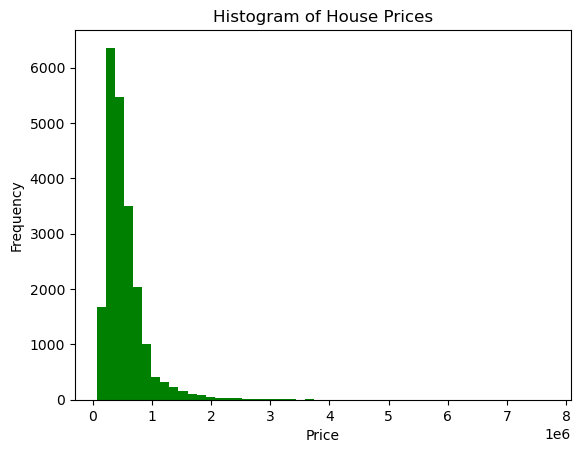

In [39]:
#Histogram for price
plt.hist(kc_house_data["price"], bins=50, color="green")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices")
plt.show()

In [40]:
#Getting the descriptive statistics for the "bedrooms" column(mean,median,mode and the five number summary)
mean_bedrooms=np.mean(kc_house_data["bedrooms"])
print("The mean of bedrooms is",mean_bedrooms)
median_bedrooms=np.median(kc_house_data["bedrooms"])
print("The median of bedrooms is",median_bedrooms)
standard_deviation_bedrooms=np.median(kc_house_data["bedrooms"])
print("The standard deviation of bedrooms is",standard_deviation_bedrooms)
min_bedrooms=np.min(kc_house_data["bedrooms"])
print("The minimum of bedrooms is",min_bedrooms)
max_bedrooms=np.max(kc_house_data["bedrooms"])
print("The maximum of bedrooms is",max_bedrooms)
range_bedrooms=max_bedrooms-min_bedrooms
print("The range of bedrooms is",range_bedrooms)
Quartile_1b=np.quantile(kc_house_data["bedrooms"],0.25)
print("The 0.25 of bedrooms is",Quartile_1b)
Quartile_2b=np.quantile(kc_house_data["bedrooms"],0.50)
print("The 0.50 of bedrooms is",Quartile_2b)
Quartile_3b=np.quantile(kc_house_data["bedrooms"],0.75)
print("The 0.75 of bedrooms is",Quartile_3b)

The mean of bedrooms is 3.3731999814789093
The median of bedrooms is 3.0
The standard deviation of bedrooms is 3.0
The minimum of bedrooms is 1
The maximum of bedrooms is 33
The range of bedrooms is 32
The 0.25 of bedrooms is 3.0
The 0.50 of bedrooms is 3.0
The 0.75 of bedrooms is 4.0


<AxesSubplot: xlabel='bedrooms'>

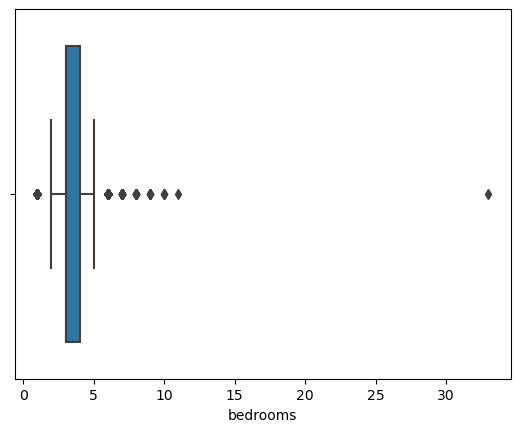

In [41]:
#Getting the box plot of the "bedrooms" column
data=kc_house_data
sns.boxplot(x="bedrooms",data=data)

In [42]:
#Getting the descriptive statistics for the "bathrooms" column(mean,median,mode and the five number summary)
mean_bathrooms=np.mean(kc_house_data["bathrooms"])
print("The mean of bathrooms is",mean_bathrooms)
median_bathrooms=np.median(kc_house_data["bathrooms"])
print("The median of bathrooms is",median_bathrooms)
standard_deviation_bathrooms=np.median(kc_house_data["bathrooms"])
print("The standard deviation of bathrooms is",standard_deviation_bathrooms)
min_bathrooms=np.min(kc_house_data["bathrooms"])
print("The minimum of bathrooms is",min_bathrooms)
max_bathrooms=np.max(kc_house_data["bathrooms"])
print("The maximum of bathrooms is",max_bathrooms)
range_bathrooms=max_bathrooms-min_bathrooms
print("The range of bathrooms is",range_bathrooms)
Quartile_1ba=np.quantile(kc_house_data["bathrooms"],0.25)
print("The 0.25 of bathrooms is",Quartile_1ba)
Quartile_2ba=np.quantile(kc_house_data["bathrooms"],0.50)
print("The 0.50 of bathrooms is",Quartile_2ba)
Quartile_3ba=np.quantile(kc_house_data["bathrooms"],0.75)
print("The 0.75 of bathrooms is",Quartile_3ba)

The mean of bathrooms is 2.1158262721674306
The median of bathrooms is 2.25
The standard deviation of bathrooms is 2.25
The minimum of bathrooms is 0.5
The maximum of bathrooms is 8.0
The range of bathrooms is 7.5
The 0.25 of bathrooms is 1.75
The 0.50 of bathrooms is 2.25
The 0.75 of bathrooms is 2.5


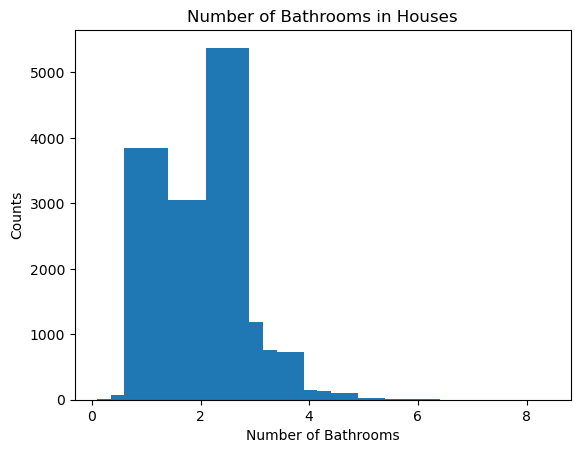

In [43]:
#Getting the barchart for the "bathrooms" columd
bathroom_counts=kc_house_data["bathrooms"].value_counts()
plt.bar(bathroom_counts.index, bathroom_counts.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Counts')
plt.title('Number of Bathrooms in Houses')
plt.show()

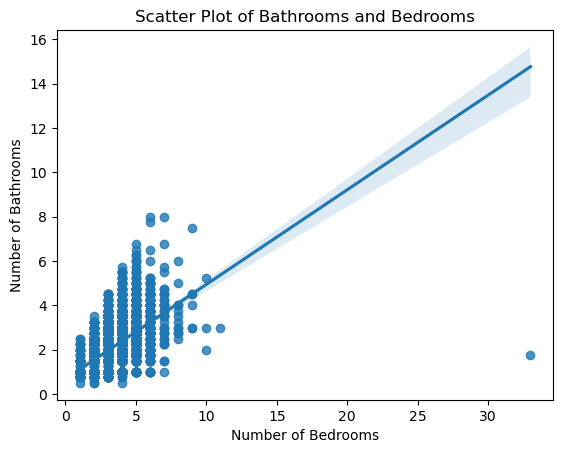

In [44]:
#Scatterplot for the "bathrooms" and the "bedrooms" columns
sns.regplot(x=kc_house_data["bedrooms"],y=kc_house_data["bathrooms"])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Bathrooms")
plt.title("Scatter Plot of Bathrooms and Bedrooms")
plt.show()

-The slope is positive indicating that as the number of bedrooms increases, the number of bathrooms increases too.

In [45]:
#Getting the descriptive statistics for the "sqft_living" column(mean,median,mode and the five number summary)
mean_sqft_living=np.mean(kc_house_data["sqft_living"])
print("The mean of sqft_living is",mean_sqft_living)
median_sqft_living=np.median(kc_house_data["sqft_living"])
print("The median of sqft_living is",median_sqft_living)
standard_deviation_sqft_living=np.median(kc_house_data["sqft_living"])
print("The standard deviation of sqft_living is",standard_deviation_sqft_living)
min_sqft_living=np.min(kc_house_data["sqft_living"])
print("The minimum of sqft_living is",min_sqft_living)
max_sqft_living=np.max(kc_house_data["sqft_living"])
print("The maximum of sqft_living is",max_sqft_living)
range_sqft_living=max_sqft_living-min_sqft_living
print("The range of sqft_living is",range_bathrooms)
Quartile_1sqftl=np.quantile(kc_house_data["sqft_living"],0.25)
print("The 0.25 of sqft_living is",Quartile_1sqftl)
Quartile_2sqftl=np.quantile(kc_house_data["sqft_living"],0.50)
print("The 0.50 of sqft_living is",Quartile_2sqftl)
Quartile_3sqftl=np.quantile(kc_house_data["sqft_living"],0.75)
print("The 0.75 of sqft_living is",Quartile_3sqftl)

The mean of sqft_living is 2080.3218502569803
The median of sqft_living is 1910.0
The standard deviation of sqft_living is 1910.0
The minimum of sqft_living is 370
The maximum of sqft_living is 13540
The range of sqft_living is 7.5
The 0.25 of sqft_living is 1430.0
The 0.50 of sqft_living is 1910.0
The 0.75 of sqft_living is 2550.0


In [46]:
#Calculating the Pearson correlation coefficient between sqft_living and price
correlation_living=kc_house_data["sqft_living"].corr(kc_house_data["price"], method="pearson")
correlation_living

0.7019173021377598

There is a strong positive correlation coefficient of 0.7019173021377598 

-Therefore means that as the living space increases the property price increases too.

In [47]:
#Getting the descriptive statistics for the "sqft_lot" column(mean,median,mode and the five number summary)
mean_sqft_lot=np.mean(kc_house_data["sqft_lot"])
print("The mean of sqft_lot is",mean_sqft_lot)
median_sqft_lot=np.median(kc_house_data["sqft_lot"])
print("The median of sqft_lot is",median_sqft_lot)
standard_deviation_sqft_lot=np.median(kc_house_data["sqft_lot"])
print("The standard deviation of sqft_lot is",standard_deviation_sqft_lot)
min_sqft_lot=np.min(kc_house_data["sqft_lot"])
print("The minimum of sqft_lot is",min_sqft_lot)
max_sqft_lot=np.max(kc_house_data["sqft_lot"])
print("The maximum of sqft_lot is",max_sqft_lot)
range_sqft_lot=max_sqft_lot-min_sqft_lot
print("The range of sqft_lot is",range_sqft_lot)
Quartile_sqft_lot=np.quantile(kc_house_data["sqft_lot"],0.25)
print("The 0.25 of sqft_lot is",Quartile_sqft_lot)
Quartile_sqft_lot=np.quantile(kc_house_data["sqft_lot"],0.50)
print("The 0.50 of sqft_lot is",Quartile_sqft_lot)
Quartile_sqft_lot=np.quantile(kc_house_data["sqft_lot"],0.75)
print("The 0.75 of sqft_lot is",Quartile_sqft_lot)

The mean of sqft_lot is 15099.408760475992
The median of sqft_lot is 7618.0
The standard deviation of sqft_lot is 7618.0
The minimum of sqft_lot is 520
The maximum of sqft_lot is 1651359
The range of sqft_lot is 1650839
The 0.25 of sqft_lot is 5040.0
The 0.50 of sqft_lot is 7618.0
The 0.75 of sqft_lot is 10685.0


In [48]:
#Getting the descriptive statistics for the "floors" column(mean,median,mode and the five number summary)
mean_floors=np.mean(kc_house_data["floors"])
print("The mean of floors is",mean_floors)
median_floors=np.median(kc_house_data["floors"])
print("The median of floors is",median_floors)
standard_deviation_floors=np.median(kc_house_data["floors"])
print("The standard deviation of floors is",standard_deviation_floors)
min_floors=np.min(kc_house_data["floors"])
print("The minimum of floors is",min_floors)
max_floors=np.max(kc_house_data["floors"])
print("The maximum of floors is",max_floors)
range_floors=max_floors-min_floors
print("The range of floors is",range_floors)
Quartile_floors=np.quantile(kc_house_data["floors"],0.25)
print("The 0.25 of floors is",Quartile_floors)
Quartile_floors=np.quantile(kc_house_data["floors"],0.50)
print("The 0.50 of floors is",Quartile_floors)
Quartile_floors=np.quantile(kc_house_data["floors"],0.75)
print("The 0.75 of floors is",Quartile_floors)

The mean of floors is 1.4940964022780943
The median of floors is 1.5
The standard deviation of floors is 1.5
The minimum of floors is 1.0
The maximum of floors is 3.5
The range of floors is 2.5
The 0.25 of floors is 1.0
The 0.50 of floors is 1.5
The 0.75 of floors is 2.0


In [49]:
#Getting the descriptive statistics for the "sqft_above" column(mean,median,mode and the five number summary)
mean_sqft_above=np.mean(kc_house_data["sqft_above"])
print("The mean of sqft_above is",mean_sqft_above)
median_sqft_above=np.median(kc_house_data["sqft_above"])
print("The median of sqft_above is",median_sqft_above)
standard_deviation_sqft_above=np.median(kc_house_data["sqft_above"])
print("The standard deviation of sqft_above is",standard_deviation_sqft_above)
min_sqft_above=np.min(kc_house_data["sqft_above"])
print("The minimum of sqft_above is",min_sqft_above)
max_sqft_above=np.max(kc_house_data["sqft_above"])
print("The maximum of sqft_above is",max_sqft_above)
range_sqft_above=max_sqft_above-min_sqft_above
print("The range of sqft_above is",range_sqft_above)
Quartile_sqft_above=np.quantile(kc_house_data["sqft_above"],0.25)
print("The 0.25 of sqft_above is",Quartile_sqft_above)
Quartile_sqft_above=np.quantile(kc_house_data["sqft_above"],0.50)
print("The 0.50 of sqft_above is",Quartile_sqft_above)
Quartile_sqft_above=np.quantile(kc_house_data["sqft_above"],0.75)
print("The 0.75 of sqft_above is",Quartile_sqft_above)

The mean of sqft_above is 1788.5968421540028
The median of sqft_above is 1560.0
The standard deviation of sqft_above is 1560.0
The minimum of sqft_above is 370
The maximum of sqft_above is 9410
The range of sqft_above is 9040
The 0.25 of sqft_above is 1190.0
The 0.50 of sqft_above is 1560.0
The 0.75 of sqft_above is 2210.0


In [50]:
#Getting the descriptive statistics for the "sqft_basement" column(mean,median,mode and the five number summary)
mean_sqft_basement=np.mean(kc_house_data["sqft_basement"])
print("The mean of sqft_basement is",mean_sqft_basement)
median_sqft_basement=np.median(kc_house_data["sqft_basement"])
print("The median of sqft_basement is",median_sqft_basement)
standard_deviation_sqft_basement=np.median(kc_house_data["sqft_basement"])
print("The standard deviation of sqft_basement is",standard_deviation_sqft_basement)
min_sqft_basement=np.min(kc_house_data["sqft_basement"])
print("The minimum of sqft_basement is",min_sqft_basement)
max_sqft_basement=np.max(kc_house_data["sqft_basement"])
print("The maximum of sqft_basement is",max_sqft_basement)
range_sqft_basement=max_sqft_basement-min_sqft_basement
print("The range of sqft_basement is",range_sqft_basement)
Quartile_sqft_basement=np.quantile(kc_house_data["sqft_basement"],0.25)
print("The 0.25 of sqft_basement is",Quartile_sqft_basement)
Quartile_sqft_basement=np.quantile(kc_house_data["sqft_basement"],0.50)
print("The 0.50 of sqft_basement is",Quartile_sqft_basement)
Quartile_sqft_basement=np.quantile(kc_house_data["sqft_basement"],0.75)
print("The 0.75 of sqft_basement is",Quartile_sqft_basement)

The mean of sqft_basement is 285.7165810066213
The median of sqft_basement is 0.0
The standard deviation of sqft_basement is 0.0
The minimum of sqft_basement is 0.0
The maximum of sqft_basement is 4820.0
The range of sqft_basement is 4820.0
The 0.25 of sqft_basement is 0.0
The 0.50 of sqft_basement is 0.0
The 0.75 of sqft_basement is 550.0


In [51]:
#Getting the descriptive statistics for the "condition" column 
print(kc_house_data["condition"].value_counts())

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


-Here is an arrangement of the number of houses according to condition:-

3=AVERAGE(Most houses are in this condition)

4=GOOD

5=EXCELLENT

2=FAIR

1=POOR(Least number of houses are in this condition)



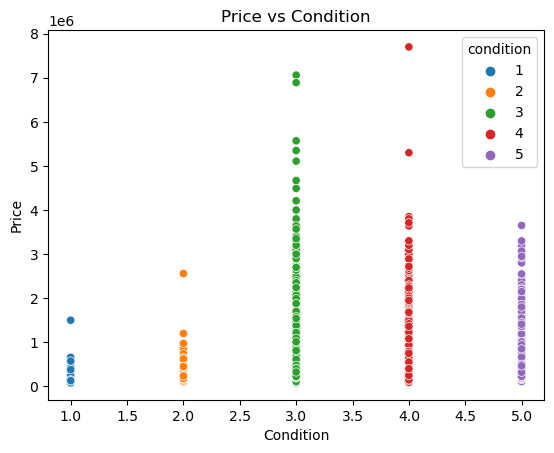

In [52]:
#Getting the scatterplot for the condition and price
sns.scatterplot(x="condition",y="price",hue="condition",data=data)
plt.title('Price vs Condition')
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

    Now that i have done some descriptive statistics and established some relatiosnhips between the variables, I can now proceed.

# STEP FIVE: SCALING AND NORMALIZATION AND VISUALIZATION

# QUESTION ONE: Do prices vary according to zipcode, if so which zipcodes have higher prices distribution

-For this question I am going to test whether there is a difference in price distribution in accordance to the zipcodes.

-There are 70 zipcodes which can be shown below.

- I am going to check the top 20 zipcodes with highest price distribution. These zipcodes are the ones I am going to recommend the stakeholders to invest in those zipcodes to maximise profits

In [53]:
#Scaling the data to be used
from sklearn.preprocessing import MinMaxScaler
zipcode1=kc_house_data[["zipcode"]]
price1=kc_house_data["price"]
scal=MinMaxScaler()
price1_scaled=scal.fit_transform(price1.values.reshape(-1,1))
kc_house_data["scaled_prices"]=price1_scaled
kc_house_data["scaled_prices"]

0        0.018880
1        0.060352
2        0.013382
3        0.069011
4        0.056678
           ...   
21592    0.036998
21593    0.042246
21594    0.042522
21595    0.042246
21596    0.032406
Name: scaled_prices, Length: 21597, dtype: float64

In [54]:
#Getting the mean price for each zipcode
mean_price=kc_house_data.groupby("zipcode")["scaled_prices"].mean().reset_index()
mean_price

,zipcode,scaled_prices
0,98001,0.026659
1,98002,0.020504
2,98003,0.028354
3,98004,0.167741
4,98005,0.096076
...,...,...
65,98177,0.078512
66,98178,0.030519
67,98188,0.027693
68,98198,0.029506


In [55]:
#Getting the top 20 zipcodes with the highest price distribution
top_20= mean_price.sort_values("scaled_prices", ascending=False).head(20)
print(top_20["zipcode"])

24    98039
3     98004
25    98040
48    98112
41    98102
47    98109
43    98105
5     98006
53    98119
4     98005
21    98033
69    98199
38    98075
37    98074
39    98077
29    98053
65    98177
7     98008
28    98052
54    98122
Name: zipcode, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]


-We have gotten the top ten zipcodes with the highest price distribution.

-Upon further research I have established that the zipcodes correspond to the following areas. The areas have been arranged in order of highest mean price distribution to the lowest. 

* **(1)98039: Medina, a city in county, Washington**

* **(2)98004: Bellevue, a city in county, Washington**

* **(3)98040: Mercer Island,a city in county, Washington**

* **(4)98112: Capitol Hill, Seattle, Washington**

* **(5)98102: Eastlake, Seattle, Washington**

* **(6)98109: Queen Anne, Seattle, Washington**

* **(7)98105: University District, Seattle, Washington**

* **(8)98006: Eastgate, Bellevue, Washington**

* **(9)98119: Queen Anne, Seattle, Washington**

* **(10)98005: Factoria, Bellevue, Washington**

* **(11)1198033: Kirkland, a city in King County, Washington**

* **(12)98199: Magnolia, Seattle, Washington**

* **(13)98075: Sammamish, a city in King County, Washington**

* **(14)98074: Sammamish, a city in King County, Washington**

* **(15)98077: Woodinville, a city in King County, Washington**

* **(16)98053: Redmond, a city in King County, Washington**

* **(17)98177: Richmond Beach, Shoreline, Washington**

* **(18)98008: Crossroads, Bellevue, Washington**

* **(19)98052: Redmond, a city in King County, Washington**

* **(20)98122: Central District, Seattle, Washington**


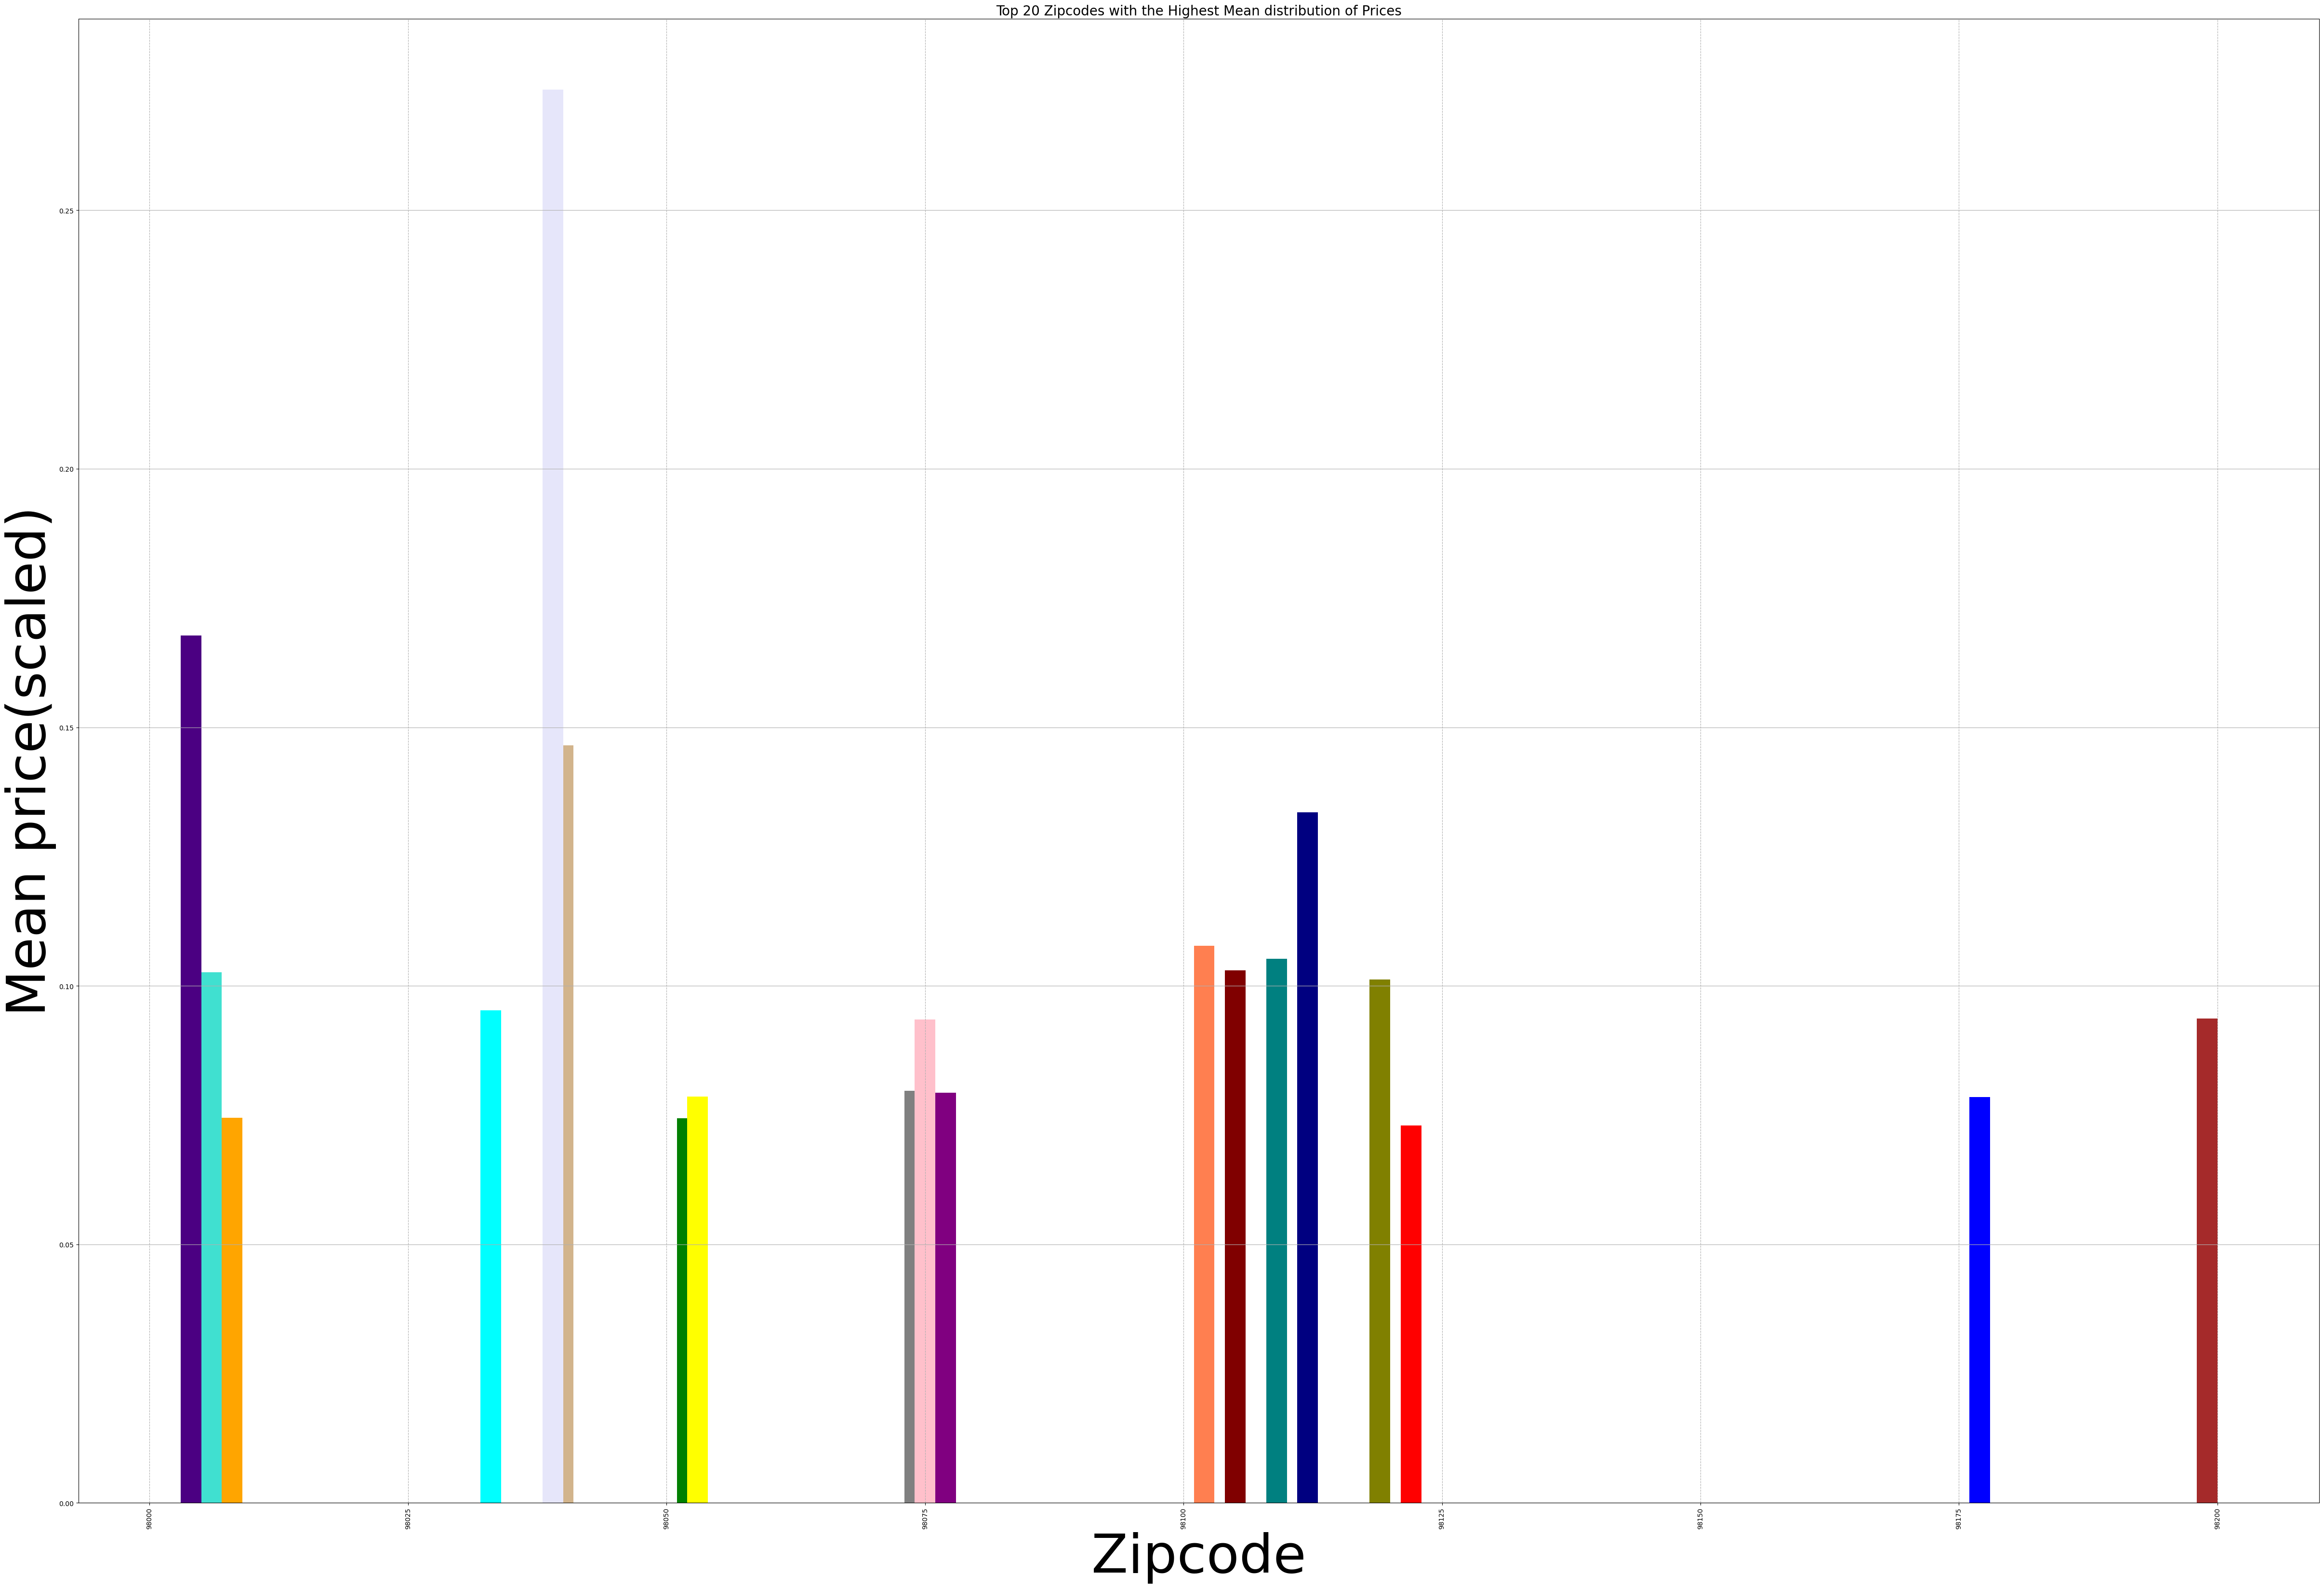

In [56]:
#Creating a bar plot to visualize
colors = ["red", "green", "orange", "blue", "yellow", "purple", "gray", "pink", "brown", "cyan", "magenta", "olive", "turquoise", "maroon", "teal", "coral", "navy", "tan", "indigo", "lavender"]
top_20_sorted = top_20.sort_values(by=["scaled_prices"])
plt.figure(figsize=(60,40))
plt.bar(top_20_sorted["zipcode"], top_20_sorted["scaled_prices"],color=colors,linewidth=20,width=2.0)
plt.xlabel("Zipcode",fontsize=80)
plt.ylabel("Mean price(scaled)",fontsize=80)
plt.xticks(rotation=90)
plt.title("Top 20 Zipcodes with the Highest Mean distribution of Prices", fontsize=20)
plt.grid(axis="y")
plt.grid(axis="x",linestyle="--")
plt.show()

-Now that we know the top 20 zipcodes with the highest price distribution. These are the zipcodes i am going to recommend the stakeholders to invest in.

-I am also going to limit any further analysis to these zipcodes.

-This way i can ensure that the stake holders get maximum profit when they make any investments.

# Can I visualize the locations with the highest price distribution

- The new dataframe will consist of the zipcodes with the top 20 highest distribution of price

In [57]:
#Sorting the data set by price in descending order
sort_data=kc_house_data.sort_values(by="price", ascending=False)
# Grouping the data set by zip code and calculating the mean price for each group
grouped_data=sort_data.groupby("zipcode").agg({"price":"mean"})
#Sorting the groups by mean price in descending order
sorted_groups=grouped_data.sort_values(by="price",ascending=False)
# Select the top 20 groups with the highest mean price
top_20_groups=sorted_groups.head(20)
# Get the zip codes of the top 20 groups
top_20_zipcodes=top_20_groups.index.tolist()
# Filter the original data set to keep only the data points with the top 20 zip codes
filtered_data=kc_house_data[kc_house_data["zipcode"].isin(top_20_zipcodes)]
# Create a new data frame with the filtered data
new_data=pd.DataFrame(filtered_data)
new_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,scaled_prices
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.056678
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0.151141
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,...,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208,0.042246
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336,0.252165
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,1750,700.0,1915,0.0,98119,47.6386,-122.360,1760,3573,0.112700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,2025049203,6/10/2014,399950.0,2,1.00,710,1157,2.0,0.0,0.0,...,710,0.0,1943,0.0,98102,47.6413,-122.329,1370,1173,0.042240
21574,7430200100,5/14/2014,1220000.0,4,3.50,4910,9444,1.5,0.0,0.0,...,3110,1800.0,2007,0.0,98074,47.6502,-122.066,4560,11063,0.149829
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,...,3410,0.0,2007,0.0,98040,47.5653,-122.223,2290,10125,0.197061
21583,7202300110,9/15/2014,810000.0,4,3.00,3990,7838,2.0,0.0,0.0,...,3990,0.0,2003,0.0,98053,47.6857,-122.046,3370,6814,0.096038


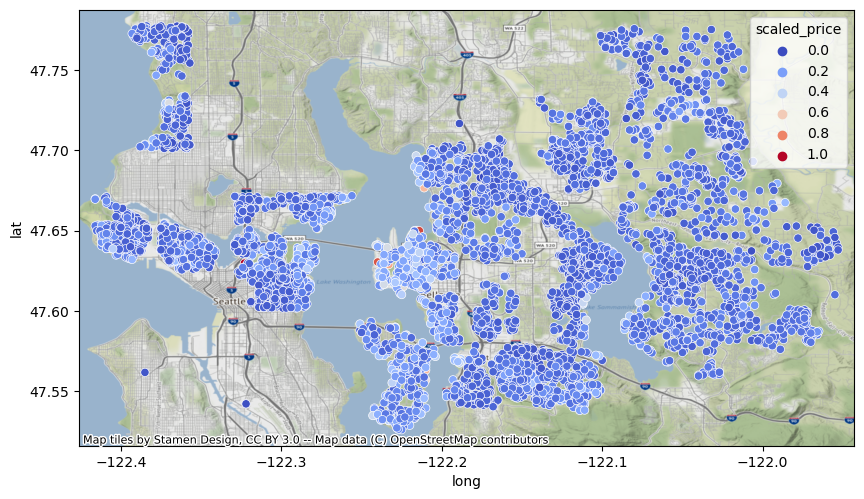

In [58]:
#Creating a map to visualize the highest price distributions 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(new_data[["price"]])
new_data["scaled_price"]=scaler.transform(new_data[["price"]])
plt.figure(figsize=(10,10))
sns.scatterplot(data=new_data,x="long",y="lat",hue="scaled_price",palette="coolwarm")
plt.xlim(new_data["long"].min()-0.01,new_data["long"].max()+0.01)
plt.ylim(new_data["lat"].min()-0.01,new_data["lat"].max()+0.01)
ctx.add_basemap(ax=plt.gca(),crs="EPSG:4326")

-The warmer colours represent the areas with a higher price distribution.

# -In order to conduct analysis to check for the next questions , i am going to conduct a multiple regression

# Here I am going to conduct multiple regression by first testing the assumptions of regression


<AxesSubplot: >

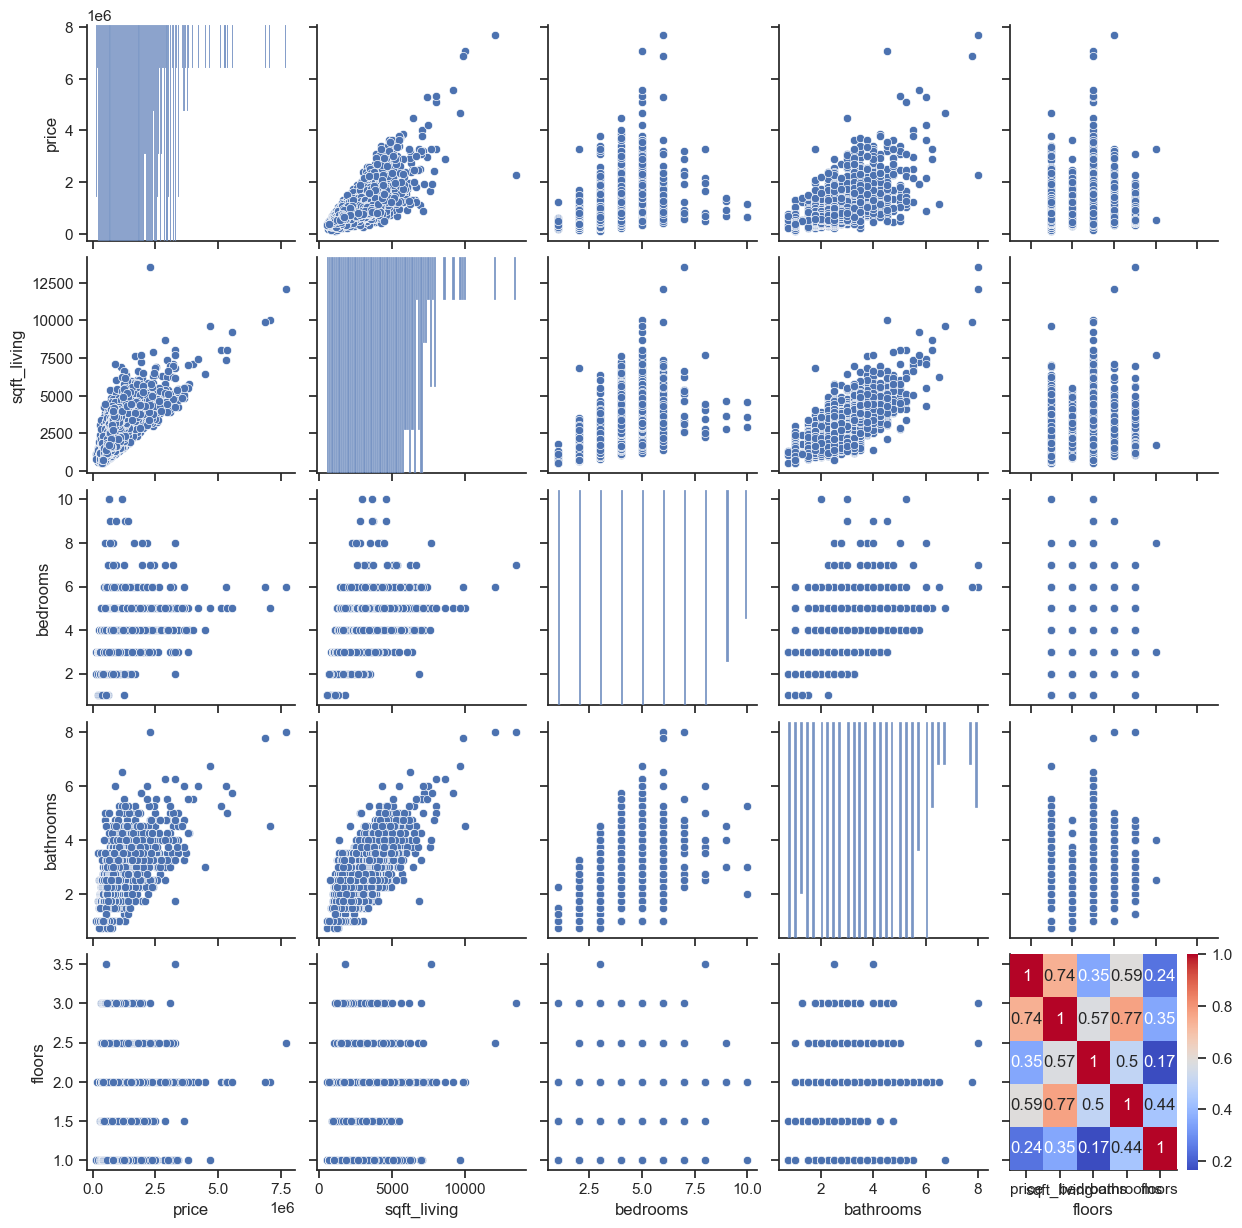

In [59]:
# ASSUMPTION 1 : LITTLE TO NO MULTICOLLINEARITY
selected_columns=["price","sqft_living","bedrooms","bathrooms","floors"]
data=new_data[selected_columns]
sns.set(style="ticks",color_codes=True)
sns.pairplot(data)
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")

There is multicollinearity in multiple variables 

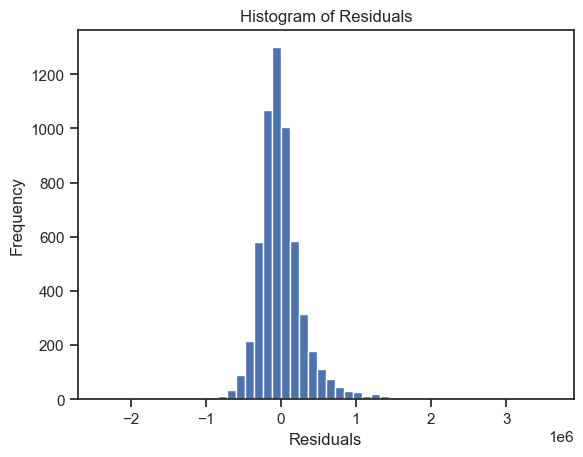

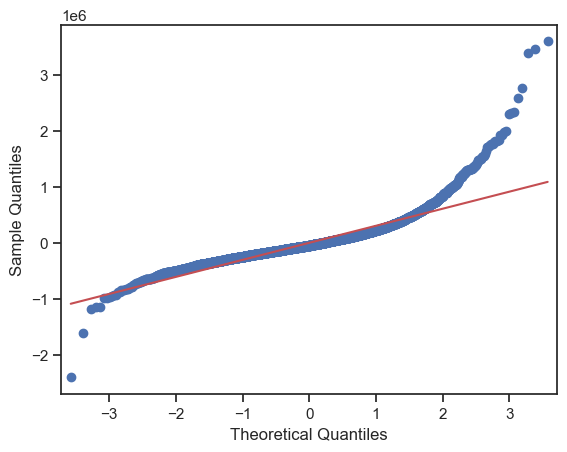

In [60]:
#ASSUMPTION 2: Normality
import statsmodels.api as sm
y=new_data["price"]
x=new_data[["sqft_living","bedrooms","bathrooms","floors"]]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
residuals=model.resid
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()
sm.qqplot(residuals,line="r")
plt.show()

-There is no normality
-presence of heavier tails(leptokurtosis)

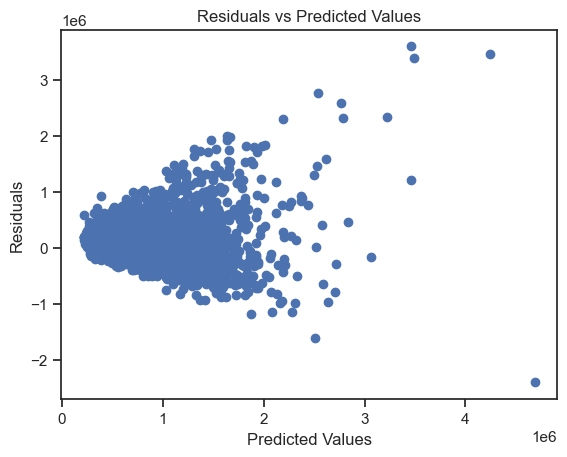

In [61]:
#ASSUMPTION 3: HOMOSCEDASTICITY
x= sm.add_constant(x)
model=sm.OLS(y,x).fit()
residuals=model.resid
predicted=model.fittedvalues
plt.scatter(predicted, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

- There is presence of heteroscacidity 

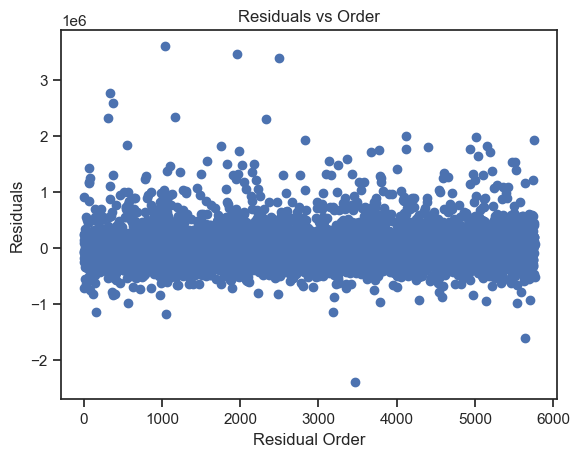

In [62]:
# ASSUMPTION 4: INDEPENDENCE
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
residuals=model.resid
plt.scatter(x=range(len(residuals)),y=residuals)
plt.xlabel("Residual Order")
plt.ylabel("Residuals")
plt.title("Residuals vs Order")
plt.show()

- No slope there fore indicating that there is independence 

# *****

- The Variables need to undergo scaling and normalization before building a multiple regression model in order to improve the accuracy o the model.

- No multiple regression assumptions were met, prompting me to scale and normalize the data.

# *********

# Using multiple regression to test some questions



# ESTABLISHING A NULL AND AN ALTERNATIVE HYPOTHESIS BEFORE CREATING THE MODEL
- **NULL HYPOTHESIS**- All the coefficients in the regression model are EQUAL to zero therefore indicating no relationship between the dependent and independent variables 
- **ALTERNATIVE HYPOTHESIS**- At least one of the coefficients is not equal to zero , indicating that there is significant relationship between the dependent and independent variables.

-Dependent variable(y)-"price"
Independent variable(X)-"bedrooms","bathrooms","sqft_living","floors"

In [63]:
#Creating a multiple regression model 
#Conducting a multiple regression to determine what affects price
#Selecting the input variables and output variable
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X=new_data[["bedrooms","bathrooms","sqft_living","floors"]]
Y=new_data["price"]                                                                                                                                                              
#Standard scaling
scalez=StandardScaler()
X=scalez.fit_transform(X)
Y=scalez.fit_transform(Y.values.reshape(-1,1))                                                                                                             
modelz=LinearRegression()                                                                                                                                     
modelz.fit(X,Y)                                                                                                                                                             
r_squared_z=modelz.score(X,Y)
print("The R-squared value is", r_squared_z)
print("The intercept is",modelz.intercept_)
print("The coefficient is",modelz.coef_)                                                                     

The R-squared value is 0.5593942582215159
The intercept is [-8.95976311e-17]
The coefficient is [[-0.11787367  0.07385198  0.76590915 -0.04113937]]


- The R-squared value of 0.5593942582215159 gives a suggestion that about 56 percent of the independent variables explain price
- The intercept may not hold as it is not possible to have all the independent variables at zero, however sinnce the intercept value of -8.95976311e-17 is close to zero, this means that when all the independent variables are close to zero, the price is also close to zeo
- Coefficients
* **bedrooms**- The coefficient value of -0.11787367 indicates that for every standard deviation decrease in the bedrooms , the prices decrease by about 0.11787367, if all the variables were standardized .
* **bathrooms**-The coefficient value of 0.07385198  indicates that for every standard deviation increase in the bathrooms , the prices increases by about 0.07385198, if all the variables were standardized .
* **sqft_living**-The coefficient value of 0.76590915 indicates that for every standard deviation increase in the sqft_living , the prices increases by about 0.76590915, if all the variables were standardized .
* **floors**-The coefficient value of -0.04113937 indicates that for every standard deviation decrease in the floors , the prices decrease by about 0.04113937, if all the variables were standardized .


In [64]:
#Getting the model summary
import statsmodels.api as sm
# Add constant to independent variables
X=sm.add_constant(X)
model=sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1827.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:38:05   Log-Likelihood:                -5814.6
No. Observations:                5762   AIC:                         1.164e+04
Df Residuals:                    5757   BIC:                         1.167e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.551e-17      0.009  -6.35e-15      1.0

- **Dep. Variable:y**- "price" the dependent variable
- **R-squared:0.559**- 55.9 of the housing prices can be explained by the independent variable 
- **Model:OLS**-Model used was the ordinary least squares method
- **Adj. R-squared:0.559**- Same as the R-squared indicating that the model's goodness of fit is not affected by the number of independent variables 
- **F-statistic:1827**- The F-statistic of 1827 shows that the model is statistically significant in predicting prices
- **Prob (F-statistic):0.00**- The p-value associated with the F-statistic is 0.00 indicating that there is strong evidence against the null hypothesis(if the p value associated with the f-statistic is less than the indicated f-statistic of 0.05, we reject the null hypothesis). The model is statistically significant in predicting price.
- **Log-Likelihood:-5814.6**- The value of the log likelihood is relatively large indicates that the model provides a good fit into the data.
- **P-values**-All the p values are less than 0.05 therefore we reject the null hypothesis
- **Omnibus:3060.116**- used to test gor normality. The high omnibus value indicates that the residuals are not normally distributed
- **Durbin-Watson:2.013**-No significant autocorrelation- since it is close to 2 it shows the model is valid

# QUESTION TWO: IS THERE A RELATIONSHIP BETWEEN THE PRICES AND THE SQUARE FEET OF THE HOUSE?

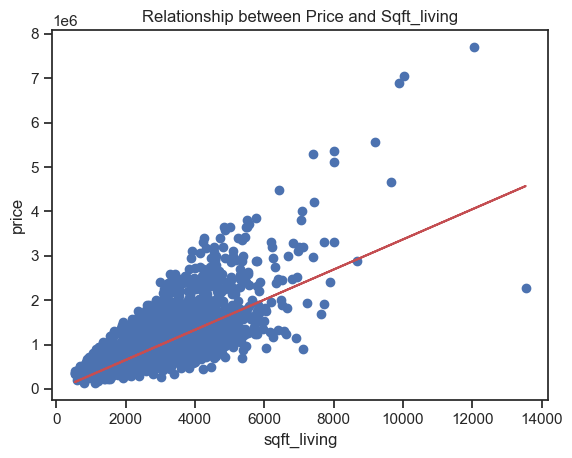

In [65]:
# Using the multiple linear regression model to visualize the relationship between sqft_living and prices
sqftl=new_data[["sqft_living"]]
prices=new_data["price"]
scalez=StandardScaler()
sqftl_scaled=scalez.fit_transform(sqftl)
#Fitting the model
modelz=LinearRegression()
modelz.fit(sqftl_scaled, prices)
#Creating a scatter plot of the two 
plt.scatter(sqftl, prices)
#Adding a regression line
plt.plot(sqftl, modelz.predict(sqftl_scaled), "r")
#Adding labels and a title
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("Relationship between Price and Sqft_living")
#Showing the scatter-plot
plt.show()

- From the above scatterplot, we can see that there is a positive slope , this indicates that as the square feet of the house increase, so does that prices of the house.
- Using the above model, I would recommend that the stakeholders invest in houses with a higher number in square feet to maximise their profits.

# QUESTION THREE: IS THERE A RELATIONSHIP BETWEEN PRICES AND THE NUMBER OF FLOORS OF THE HOUSE

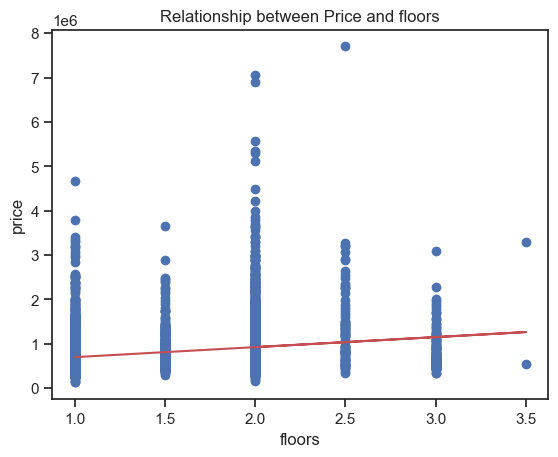

In [66]:
# Using the multiple linear regression model to visualize the relationship between floors and prices
floorz=new_data[["floors"]]
prices=new_data["price"]
scalez=StandardScaler()
floorz_scaled=scalez.fit_transform(floorz)
#Fitting the model
modelz=LinearRegression()
modelz.fit(floorz_scaled, prices)
#Creating a scatter plot of the two 
plt.scatter(floorz, prices)
#Adding a regression line
plt.plot(floorz, modelz.predict(floorz_scaled), "r")
#Adding labels and a title
plt.xlabel("floors")
plt.ylabel("price")
plt.title("Relationship between Price and floors")
#Showing the scatter-plot
plt.show()

- The scatterplot does not show the between the prices and floors adequately though we can still see a positive slope showing that higher number of floors attract higher prices.
- I would therefore recommend that the stakeholders invest in houses with higher number of floors.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\1051435260.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  floors_grouped_data = floors_data.groupby("floors")["price", "predicted_price"].mean().reset_index()


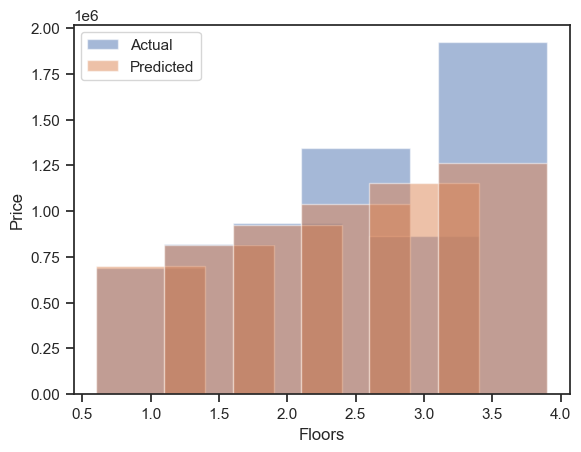

In [67]:
# Create a dataframe with the floors values, actual prices, and predicted prices
floors_data = pd.DataFrame({"floors": new_data["floors"], "price": new_data["price"], "predicted_price": modelz.predict(scalez.transform(new_data[["floors"]]))})
# Group the data by floors and calculate the mean actual and predicted prices
floors_grouped_data = floors_data.groupby("floors")["price", "predicted_price"].mean().reset_index()
# Create a bar chart with actual and predicted prices as a function of floors
plt.bar(floors_grouped_data["floors"], floors_grouped_data["price"], alpha=0.5, label="Actual")
plt.bar(floors_grouped_data["floors"], floors_grouped_data["predicted_price"], alpha=0.5, label="Predicted")
plt.xlabel("Floors")
plt.ylabel("Price")
plt.legend()
plt.show()

- From the barchart we can see that larger number of floors attract higher prices 
- I would therefore recommend that the stake holders invest in houses with higher number of floors

# QUESTION THREE: IS THERE A RELATIONSHIP BETWEEN PRICES AND THE NUMBER OF BATHROOMS OF THE HOUSE

C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bathrooms
Feature names seen at fit time, yet now missing:
- floors

  warnings.warn(message, FutureWarning)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\3393304503.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bathrooms_grouped_data = bathrooms_data.groupby("bathrooms")["price", "predicted_price"].mean().reset_index()


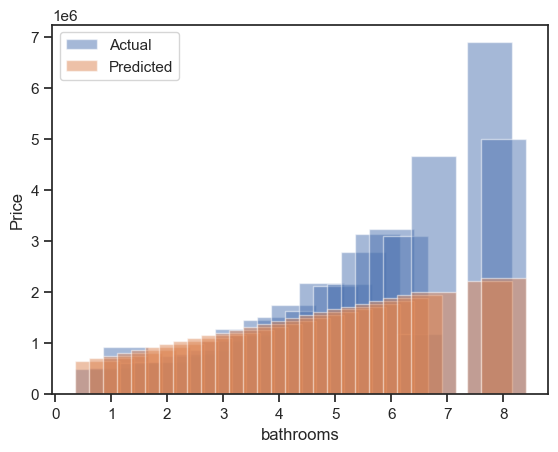

In [68]:
#Creating a barchart to visualize this relationship
#Creating a dataframe with the bathrooms values, actual prices, and predicted prices
bathrooms_data = pd.DataFrame({"bathrooms": new_data["bathrooms"], "price": new_data["price"], "predicted_price": modelz.predict(scalez.transform(new_data[["bathrooms"]]))})
#Grouping the data by floors and calculate the mean actual and predicted prices
bathrooms_grouped_data = bathrooms_data.groupby("bathrooms")["price", "predicted_price"].mean().reset_index()
#Creating a bar chart with actual and predicted prices as a function of bathrooms
plt.bar(bathrooms_grouped_data["bathrooms"],bathrooms_grouped_data["price"], alpha=0.5, label="Actual")
plt.bar(bathrooms_grouped_data["bathrooms"],bathrooms_grouped_data["predicted_price"], alpha=0.5, label="Predicted")
plt.xlabel("bathrooms")
plt.ylabel("Price")
plt.legend()
plt.show()

- From the barchart we can see that larger number of bathrooms attract higher prices 
- I would therefore recommend that the stake holders invest in houses with higher number of bathrooms

# QUESTION THREE: IS THERE A RELATIONSHIP BETWEEN PRICES AND THE NUMBER OF BEDROOMS OF THE HOUSE

C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bedrooms
Feature names seen at fit time, yet now missing:
- floors

  warnings.warn(message, FutureWarning)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10032\317866162.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bedrooms_grouped_data=bedrooms_data.groupby("bedrooms")["price", "predicted_price"].mean().reset_index()


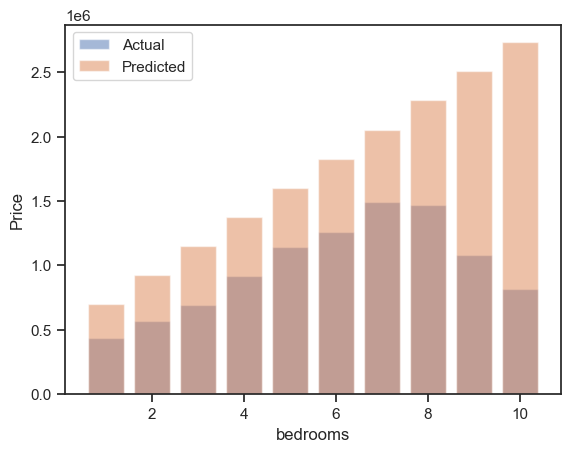

In [69]:
#Creating a barchart to visualize this relationship
#Creating a dataframe with the bathrooms values, actual prices, and predicted prices
bedrooms_data=pd.DataFrame({"bedrooms": new_data["bedrooms"], "price": new_data["price"], "predicted_price": modelz.predict(scalez.transform(new_data[["bedrooms"]]))})
#Grouping the data by bedrooms and calculate the mean actual and predicted prices
bedrooms_grouped_data=bedrooms_data.groupby("bedrooms")["price", "predicted_price"].mean().reset_index()
#Creating a bar chart with actual and predicted prices as a function of bedrooms
plt.bar(bedrooms_grouped_data["bedrooms"],bedrooms_grouped_data["price"], alpha=0.5, label="Actual")
plt.bar(bedrooms_grouped_data["bedrooms"],bedrooms_grouped_data["predicted_price"], alpha=0.5, label="Predicted")
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.legend()
plt.show()

- From the barchart we can see that the houses that have a range of bedrooms from 6-8 attract higher prices
- A house with 7 bedrooms attracts the highest prices
- The higher the number of bedrooms , the higher the prices up to a certain point. Beyond 8 bedrooms the prices begin to drop , probably cause any number beyond 8 is overkill.

# Business Recommendations
-I would strongly advice on the following recommandations to Maison Real Estate Agency.

- They should carry out their investments in the floowing zipcodes as they attract the highest prices.
       - *(1)98039: Medina, a city in county, Washington*
       - *(2)98004: Bellevue, a city in county, Washington*
       - *(3)98040: Mercer Island,a city in county, Washington*
       - *(4)98112: Capitol Hill, Seattle, Washington*
       - *(5)98102: Eastlake, Seattle, Washington*
       - *(6)98109: Queen Anne, Seattle, Washington*
       - *(7)98105: University District, Seattle, Washington*
       - *(8)98006: Eastgate, Bellevue, Washington*
       - *(9)98119: Queen Anne, Seattle, Washington*
       - *(10)98005: Factoria, Bellevue, Washington*
       - *(11)1198033: Kirkland, a city in King County, Washington*
       - *(12)98199: Magnolia, Seattle, Washington*
       - *(13)98075: Sammamish, a city in King County, Washington*
       - *(14)98074: Sammamish, a city in King County, Washington*
       - *(15)98077: Woodinville, a city in King County, Washington*
       - *(16)98053: Redmond, a city in King County, Washington*
       - *(17)98177: Richmond Beach, Shoreline, Washington*
       - *(18)98008: Crossroads, Bellevue, Washington*
       - *(19)98052: Redmond, a city in King County, Washington*
       - *(20)98122: Central District, Seattle, Washington*
- I would therefore recommend that the stake holders invest in houses with higher number of bathrooms.
-  I would recommend that the stakeholders invest in houses with a higher number in square feet to maximise their profits.
- I would therefore recommend that the stakeholders invest in houses with higher number of floors.
- A house with 7 bedrooms attracts the highest prices
- The higher the number of bedrooms , the higher the prices up to a certain point. Beyond 8 bedrooms the prices begin to drop , - probably cause any number beyond 8 is overkill.


# Conclusion
- The goal of this project was to provide sound recommendations that Maison Real Estate Agency should follow when making investments in housing. Of course they would want to realise profits , that is why it was necessary to conduct the analysis to give great advice when it came to their investment process. From the analysis we have noted that Yes the data needed some extra research in order to understand it better, It was also necessary to prepare the data adequately in order to get the best out of the results. After building a model and using it to predict, with full confidence I can recommend that they Maison Real Estate Agency should, carry out their investments in the mentioned zip codes as they attract the highest prices, they should also invest in houses with higher number of bathrooms, on top of that they should invest in houses with a higher number in square feet to maximise their profits and finally they should aim for houses with about 7 bedrooms, not lesser than 5 or greater than 8 in order to realise maximum profits.

## References
https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


# END